In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
var = ['R&D Spend', 'Profit']
X1 = df[var].values

from sklearn.cluster import KMeans

inertia = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

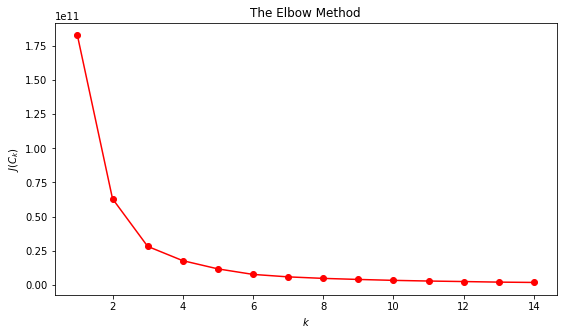

In [4]:
plt.figure(figsize=(9, 5))
plt.plot(range(1, 15), inertia, marker='o', color='r')
plt.title('The Elbow Method')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X1)
labels = kmeans.fit_predict(X1)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

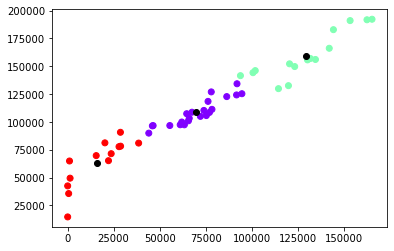

In [6]:
plt.scatter(X1[:, 0], X1[0:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], color='k')
plt.show()

In [7]:
var = ['R&D Spend', 'Marketing Spend', 'Profit']
X = df[var].values

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

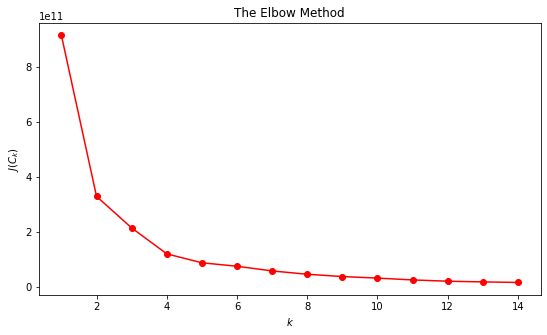

In [8]:
plt.figure(figsize=(9, 5))
plt.plot(range(1, 15), inertia, marker='o', color='r')
plt.title('The Elbow Method')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.fit_predict(X)
labels

array([3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 2, 0, 0, 0])

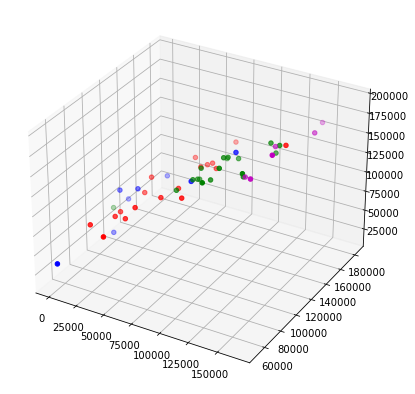

In [10]:
from mpl_toolkits.mplot3d import Axes3D

df['Labels'] = labels
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['R&D Spend'][df.Labels==0],df['Administration'][df.Labels==0],df['Profit'][df.Labels==0], c='b')
ax.scatter(df['R&D Spend'][df.Labels==1],df['Administration'][df.Labels==1],df['Profit'][df.Labels==1], c='r')
ax.scatter(df['R&D Spend'][df.Labels==2],df['Administration'][df.Labels==2],df['Profit'][df.Labels==2], c='g')
ax.scatter(df['R&D Spend'][df.Labels==3],df['Administration'][df.Labels==3],df['Profit'][df.Labels==3], c='m')
plt.show()